## Project Objectives/Summary

1. This is a **Natural Language Processing (NLP)** project on finding out the trends of the current data science/analytics in the Singapore job market.
2. This project tries to find out industry factors that are most important in predicting the salary amounts and the factors that distinguish job categories and titles from each other.
3. **Data Mining **: My data was webscrapped as a group project from the following 8 websites: sgintern, efinancialcareers, glassdoor, mycareersfuture, indeed, jobstreet, jobcentral, jobsbank.sg, and stjobs. The interest is in the features of job titles, job descriptions, salary, and hiring companies.
4. ** Data Preprocessing **: Data is cleaned and preprocessed before feeding into our model. Techniques include Stemmatizing, Lemmatizing, dropping null salary rows and segmenting joint words.
5. ** Data Modelling **: I am using the job description column to predict the salary and job category. Regressors and Classifiers were tested. I used the model with the best scores to determine which are the important keywords. Determination of keywords is done by looking at the coefficients attached to the words, the higher the coefficient means this could be an important keyword.
6. **Final Analysis **: I gathered all the important keywords and formulated a possible story around these keywords.

In [1]:
# Standard Data Science Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from segment.segmenter import Analyzer
from textblob import TextBlob, Word

%matplotlib inline

### Data was webscrapped, saved as .csv format and imported into dataframe.

In [2]:
column_names = ['title', 'jd', 'salary', 'company']
df = pd.read_csv('combined3.csv')
df.columns = column_names
pd.set_option('max_colwidth', 10000)
df.head()

title  \
0  VP, Business Data Analyst, Enterprise Data Strategy, Data Management Office   
1                                                               Data Architect   
2                                                                 Data Analyst   
3                                                               Data Architect   
4                                                                 Data Manager   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [3]:
df.shape

(1506, 4)

## Natural Language Processing section

### Data Cleaning and Preprocessing

In [4]:
# Import NLP libraries. 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#### Stemming Function 

In [5]:
from textblob import TextBlob
ps = PorterStemmer()

# def stemming(text):
#     atomic = TextBlob(text)
#     clean = [ps.stem(word) for word in atomic if word not in set(stopwords.words('english'))]
#     result = ' '.join(clean)
#     return result

def stemming(text):
    for word in text:
        if word not in set(stopwords.words('english')):
            clean = ps.stem(word)
            result = ' '.join(clean)
    return result



#### Lemmatizing Function

In [6]:
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    for word in words:
        lemmatized = word.lemmatize()
    return lemmatized

#### Drop rows with salary == 'Not Specified'.

In [7]:
df = df[ (df['salary'] == 'Not Specified') == False ]

In [8]:
# Change the salary column type to float
df['salary'] = df['salary'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1421
Data columns (total 4 columns):
title      1147 non-null object
jd         1147 non-null object
salary     1147 non-null float64
company    1147 non-null object
dtypes: float64(1), object(3)
memory usage: 44.8+ KB


#### Converting the columns into the right format. 

In [9]:
df['title'] = df['title'].apply(lambda x : str(x))
df['title'] = df['title'].apply(lambda x : x.decode('utf-8'))

df['company'] = df['company'].apply(lambda x : str(x))
df['company'] = df['company'].apply(lambda x : x.decode('utf-8'))

df['jd'] = df['jd'].apply(lambda x : str(x))
df['jd'] = df['jd'].apply(lambda x : x.decode('utf-8'))
df['jd'] = df['jd'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
#df['jd'] = df['jd'].apply(lambda x : stemming(x))

#### Taking the job description column as our X, and the salary column as our y.

In [10]:
X = df['jd']

In [11]:
y = df.salary.values

#### Split those words that are joined together

In [12]:
e = Analyzer('en')
e.segment(u'abilitiesgood')

[u'abilities', u'good']

In [13]:
def split_words(sentence):
    final = []
    sent = TextBlob(sentence)
    atomic = [e.segment(w) for w in sent.words]
    for atom in atomic:
        for char in atom:
            final.append(char)
    final = " ".join(final)
    return final

In [14]:
X = X.apply(split_words)

In [15]:
X.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       VP Business Data Analyst Enterprise Data Strategy Data Management Office The Data Management Office DMO is a business function that covers Enterprise Data Governance Data Management Big Data Analytics and Enterprise Data Strategy Data Management Office ensures that UO B meets all data governance standar

### Data preparation for modelling

In [16]:
#split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [17]:
# Create Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# declare CountVectorizer
cv = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=4)
cv.fit(X_train)


CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=4,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
# Lets check the length of our data that is in a vectorized state

print('# of features: {}'.format( len(cv.get_feature_names()) ))

# of features: 11151


In [19]:
# convert vectorized X_train into dataframe
X_train = pd.DataFrame(cv.transform(X_train).todense(), columns=cv.get_feature_names())

#### Looking at which words appear the most?

In [20]:
word_counts = X_train.sum(axis=0)
atomic_words_count = word_counts.sort_values(ascending = False).head(20)
word_counts.sort_values(ascending = False).head(20)

data                4761
experience          2491
business            2396
requirements        1170
work                1169
management          1162
team                1144
skills              1108
support              934
analytics            897
knowledge            896
development          856
analysis             826
working              781
strong               740
learning             734
project              729
solutions            682
technology           643
responsibilities     641
dtype: int64

#### Plot a histogram to see the distribution of the top 20 atomic words

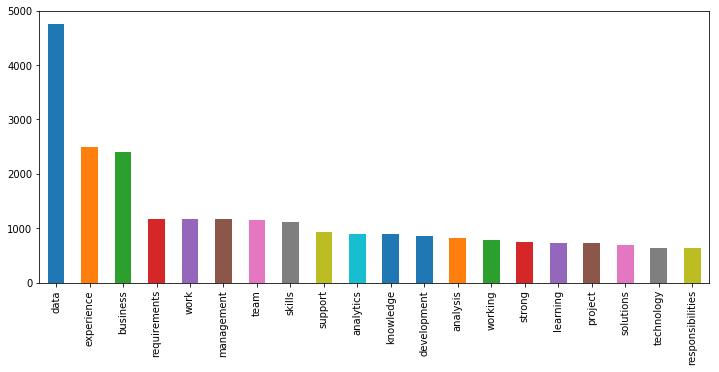

In [21]:
atomic_words_count.plot(kind='bar', figsize=(12,5))

In [22]:
#Convert vectorized X_test into dataframe

X_test = pd.DataFrame(cv.transform(X_test).todense(),
                       columns=cv.get_feature_names())

## Regressors method

### Linear Regression Model

In [23]:
#Import and fit our logistic regression and test it too
from sklearn.linear_model import LinearRegression, LogisticRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-6.833808159684127e+24

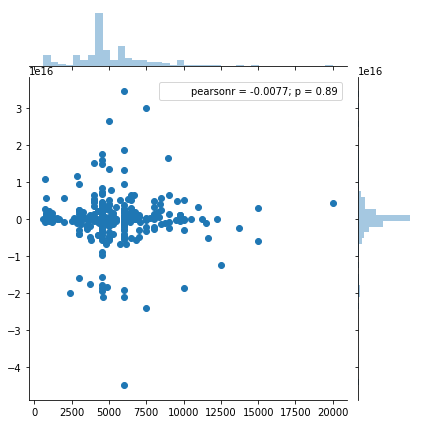

In [24]:
pred_salary = lr.predict(X_test)
sns.jointplot(y_test, pred_salary)

The score is not promising for a simple linear regression. This model may not be suitable for NLP. We will explore other methods/models.

### Lasso Model

In [25]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import cross_val_score

In [26]:
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1, n_jobs = 6)
optimal_lasso.fit(X_train, y_train)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

29.420723676487913


In [27]:
lasso = Lasso(alpha=optimal_lasso.alpha_, fit_intercept = True)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
lasso.fit(X_train, y_train)
print lasso_scores
print np.mean(lasso_scores)

[0.29211385 0.13350019 0.13190007 0.31834004 0.30896845]
0.23696452096156384


A Lasso score of 0.24 is much better than the previous model.

#### Getting the coefficients of the words

In [28]:
lasso_coefs = pd.DataFrame({'variable': cv.get_feature_names(),
                            'coef':lasso.coef_,
                            'abs_coef': np.abs(lasso.coef_)})



Lasso model is likely saying that if a candidate who is able to work in Vietnam, has good architectual level experience, deals with the quantitative, good with feature engineering skills, strong with programming, knows the pipelines and with a consistent record of accurate prediction of market data will likely to command a higher salary. 

In [29]:
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

In [30]:
lasso_coefs.head(50)

abs_coef         coef                variable
8603   1050.869510  1050.869510  roles responsibilities
5633    853.929398   853.929398                 licence
10790   759.045579   759.045579                 vietnam
1152    728.405621   728.405621                      bu
4302    625.415457   625.415457         good experience
7075    593.236203   593.236203               pipelines
5094    540.792615  -540.792615                  intern
7891    537.265183   537.265183            quantitative
6001    434.303492   434.303492             market data
1953    327.070762   327.070762              consistent
8015    322.546054   322.546054                  record
3929    319.693856   319.693856     feature engineering
344     307.395735  -307.395735                   allow
816     299.757233  -299.757233                  assist
5977    292.665723   292.665723                  manner
4190    278.241380  -278.241380                    gain
723     226.328470   226.328470               architect
5599    209.870853   209.870853                   level
7601    205.598614   205.598614             programming
8429    196.161038   196.161038        responsibilities
4786    194.504443   194.504443               including
5449    192.149090   192.149090             large scale
11109   190.645967   190.645967                   years
6595    186.737186   186.737186                  number
1394    186.573986   186.573986                 careers
3945    182.233674   182.233674                   field
3800    169.493346   169.493346             experienced
5026    169.039398   169.039398             integration
9585    162.204631  -162.204631                  strong
7270    161.235355   161.235355              predictive
3914    154.922623  -154.922623                    fast
3691    151.994626  -151.994626         experience data
997     149.671596   149.671596                   based
3816    143.988805   143.988805                  expert
5498    143.237879  -143.237879                 leading
1014    141.661449  -141.661449                   basic
1361    138.082650   138.082650            capabilities
5678    137.628392   137.628392                 limited
4661    137.545184   137.545184                  impact
10724   135.468943  -135.468943                 various
5861    135.197013   135.197013                  manage
6525    133.445440  -133.445440                     new
2666    132.047231   132.047231             demonstrate
860     132.021435  -132.021435               attention
10948   130.661432  -130.661432                    work
10247   130.139389  -130.139389                    time
6279    129.871804   129.871804                   model
8871    127.339519   127.339519                  senior
1127    125.828613  -125.828613                   brand
2906    120.788457  -120.788457               different

### Logistic Regression Model

In [31]:
logreg = LogisticRegression()

logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5)

logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

/Users/matt_dynasty/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.3391304347826087

i just want to see what happens when using LogReg if salaries are not classified into groups. It turns out the score 0.39 is much better than Linear Regression and Lasso. 

In [32]:
print logreg_scores
print np.mean(logreg_scores)

[0.27802691 0.39428571 0.38926174 0.4        0.48333333]
0.38898153968301735


** NOTE **: 
Initially, I thought LinearRegression will be a better model because salary is a range of float. But it seems a classification model likely will give a better prediction for salary. This is due to the possibility that salary is divided into groups. The more senior, the higher the salary range. I try not to use HashingVectorizer because I want to know which words actually are the factors.

#### Looking at the salary distribution over the percentiles.

In [33]:
df.salary.describe()

count     1147.000000
mean      5119.971229
std       2340.427409
min        600.000000
25%       4375.000000
50%       4500.000000
75%       6000.000000
max      20000.000000
Name: salary, dtype: float64

## Classifiers method


### Logistic Regression Model

In [34]:
# Function for categorizing the salary into HIGH(1), MIDDLE(2), LOW(3) range and use a Logistic Regression. 

def group_salary(x):
    if (x >= 6000):
        return 1
    elif x >= 4500:
        return 2
    return 3

In [35]:
yg_train = [ group_salary(x) for x in y_train ]

In [36]:
# convert list to np.array.
yg_train = np.asarray(yg_train)

In [37]:
yg_test = [ group_salary(x) for x in y_test ]
yg_test = np.asarray(yg_test)

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [39]:
logreg = LogisticRegression()

logreg_scores = cross_val_score(logreg, X_train, yg_train, cv=5)

logreg.fit(X_train, yg_train)
logreg.score(X_test, yg_test)

0.6434782608695652

In [40]:
# making a classification report
print classification_report(yg_test, logreg.predict(X_test))

             precision    recall  f1-score   support

          1       0.67      0.54      0.60       114
          2       0.59      0.71      0.65       139
          3       0.71      0.66      0.69        92

avg / total       0.65      0.64      0.64       345



The Logistic Regression Model gives a fairly good f1-score at 0.60. 

In [41]:
logreg_coefs = pd.DataFrame({'feature_names': cv.get_feature_names(), 'coef': logreg.coef_[1] })

logreg_coefs.sort_values('coef', inplace=True, ascending=False)

logreg_coefs

coef                feature_names
7601   0.468784                  programming
2539   0.440541                           dc
10952  0.427651                 work closely
10537  0.404126                         unit
3819   0.375061                    expertise
3806   0.372936                  experiences
2597   0.351957              degree computer
10594  0.349668                          use
1343   0.344408                   candidates
9422   0.343700                 stakeholders
3041   0.342381                documentation
6621   0.340816                        offer
5118   0.339418  interpersonal communication
7144   0.337996                           pm
671    0.336510                        apply
9266   0.336064                       source
6595   0.333615                       number
11104  0.327252                         year
1852   0.325768                     computer
2121   0.324304                       create
5421   0.323884                     language
2022   0.316662                     contract
6057   0.314341                  mathematics
75     0.313368                    able work
10009  0.312181                    technical
5962   0.310769                     managing
5858   0.306793                making skills
10800  0.304823                       vision
897    0.304751                     automate
1553   0.302045                       client
...         ...                          ...
1216  -0.320807                business data
8429  -0.321010             responsibilities
456   -0.322764             analyst business
2291  -0.327112                data analysis
234   -0.328772                     advanced
2716  -0.332255                       design
2777  -0.342300                      details
9893  -0.344639                          tan
380   -0.345776                          amp
3945  -0.353458                        field
5094  -0.358818                       intern
920   -0.360036                          avp
6145  -0.365475                          met
9685  -0.365990                        suite
6008  -0.367541                    marketing
260   -0.393899                 advantageous
2917  -0.397354                      digital
10078 -0.402865                   technology
3426  -0.410371                   enterprise
5909  -0.424364            management office
10247 -0.441398                         time
7545  -0.447310                     products
3106  -0.459271                       driven
1323  -0.476954                    candidate
10845 -0.485042                           vp
3397  -0.512243                       ensure
1566  -0.521036                      clients
3341  -0.590708                     engineer
8600  -0.794727                        roles
8603  -0.837245       roles responsibilities

[11151 rows x 2 columns]

Hence, I gathered from the coefficients that it is saying that candidate who are experienced in programming languages , has a degree in computer science or mathematics, has good communication skills for presentation with stakeholders and with the rank of at least an AVP will more likely to fall into the higher salary range.

In [42]:
pred_salary = logreg.predict(X_test)

/Users/matt_dynasty/anaconda2/lib/python2.7/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


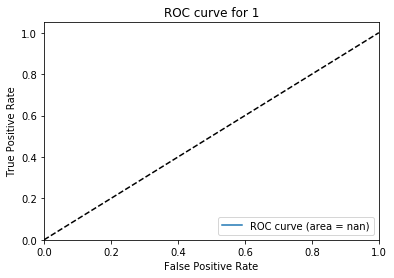

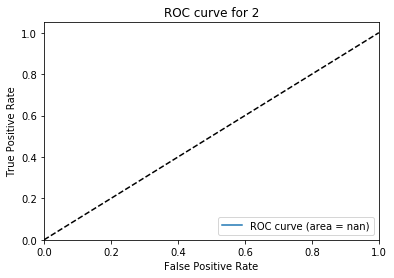

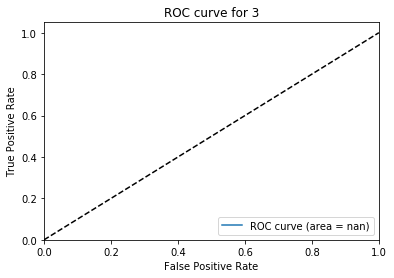

In [43]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix

categories =[1, 2, 3]
yhat_pp = logreg.predict_proba(X_test)

y_test_roc = label_binarize(y_test, classes=categories)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_pp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(len(categories)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for ' + str(categories[i]))
    plt.legend(loc="lower right")
    plt.show()

## Naive Bayes Model

In [44]:
# Trying Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
GNB_scores = cross_val_score(classifier, X_train, yg_train, cv=5)
classifier.fit(X_train, yg_train)
classifier.score(X_test, yg_test)
print classification_report(yg_test, classifier.predict(X_test))

             precision    recall  f1-score   support

          1       0.60      0.46      0.52       114
          2       0.52      0.79      0.63       139
          3       0.87      0.45      0.59        92

avg / total       0.64      0.59      0.58       345



In [45]:
# Predicting the test set results
yg_pred = classifier.predict(X_test)

In [46]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yg_test, yg_pred)
print cm

[[ 52  60   2]
 [ 25 110   4]
 [ 10  41  41]]


#### The precision score for NB is 0.63. The LogReg precision was 0.65, not significantly much better. 

In [47]:
pred_salary = classifier.predict(X_test)

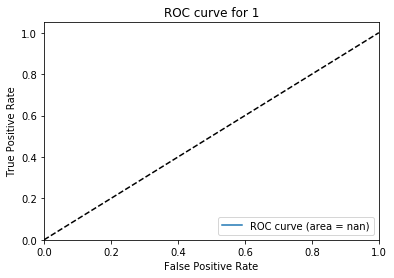

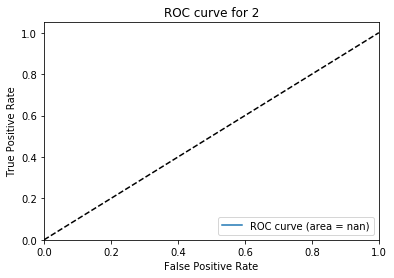

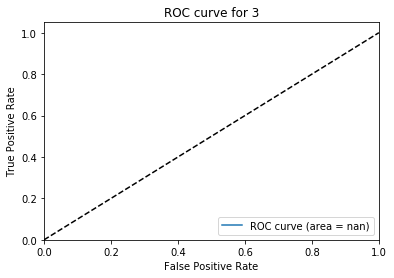

In [48]:
from sklearn.preprocessing import label_binarize

categories =[1, 2, 3]
yhat_pp = classifier.predict_proba(X_test)

y_test_roc = label_binarize(y_test, classes=categories)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_pp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(len(categories)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for ' + str(categories[i]))
    plt.legend(loc="lower right")
    plt.show()

# Job Category determinants

#### Here we only need to use the title and job description column.

In [49]:
# checking out the 
df['title'].unique()

array([u'VP, Business Data Analyst, Enterprise Data Strategy, Data Management Office',
       u'Data Architect', u'Data Analyst', u'Data Manager',
       u'Head, Big Data Engineering (Chief Data Office)',
       u'Data Lead, FCC Screening, Chief Data Office',
       u'Senior Data Analyst',
       u'Data Analyst, Group Data Management Office (1 year contract)',
       u'Data Analyst, Digital Bank', u'Senior Data Business Analyst',
       u'DATA ANALYST - CONTRACT', u'Big Data Development Lead',
       u'Big Data Implementation Lead', u'Data Engineer, Digital Bank',
       u'VP, Data Analyst, GTO', u'Associate, Data Operations',
       u'Enterprise Data Strategy Consultant',
       u'Data Scientist | Singapore', u'Business Data Analyst',
       u'Associate, Data Operations (Contract)',
       u'DevOps Engineer (Chief Data Office)',
       u'Data Scientist (Multi-Asset Investment)',
       u'Data Analyst, Group Customer Analytics & Decisioning',
       u'Fund Accounting - Data Management'

In [50]:
#df_title = df['title'].copy()
df_concat = pd.concat([df['title'], X], axis=1)
df_concat.head()

title  \
0  VP, Business Data Analyst, Enterprise Data Strategy, Data Management Office   
1                                                               Data Architect   
2                                                                 Data Analyst   
3                                                               Data Architect   
4                                                                 Data Manager   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [51]:
# Function to group the job titles into Intern, Data Engineer, Data Scientist, Data Analyst and into their respective Senior position

def group_title(x):
    
    x = x.lower()
    if 'intern' in x:
        x = 'intern'
        return x
    
    if 'engineer' in x:
        if ('avp' in x) or ('vp' in x) or ('senior' in x) or ('chief' in x):
            x = 'senior data engineer'
            return x
        else:
            x = 'data engineer'
            return x
        
    elif 'quantitative analyst' in x:
        if ('avp' in x) or ('vp' in x) or ('senior' in x) or ('chief' in x):
            x = 'senior data scientist'
            return x
        else:
            x = 'data scientist'
            return x
        
    elif 'data science' in x:
        if ('avp' in x) or ('vp' in x) or ('senior' in x) or ('chief' in x):
            x = 'senior data scientist'
            return x
        else:
            x = 'data scientist'
            return x
        
    elif 'data scientist' in x:
        if ('avp' in x) or ('vp' in x) or ('senior' in x) or ('chief' in x):
            x = 'senior data scientist'
            return x
        else:
            x = 'data scientist'
            return x
    
    elif 'analyst' in x:
        if ('avp' in x) or ('vp' in x) or ('senior' in x) or ('chief' in x):
            x = 'senior data analyst'
            return x
        else:
            x = 'data analyst'
            return x
    else:
        x = 'Others'
        return x




In [52]:
df_concat['title'] = df_concat['title'].apply(group_title)

In [53]:
df_concat['title'].value_counts()

data analyst             562
data scientist           179
Others                   178
data engineer            103
intern                    51
senior data engineer      32
senior data analyst       21
senior data scientist     21
Name: title, dtype: int64

In [54]:
df_concat['title'].unique()

array(['senior data analyst', 'Others', 'data analyst',
       'senior data engineer', 'data engineer', 'data scientist',
       'intern', 'senior data scientist'], dtype=object)

In [55]:
# The job description column
T = df_concat['jd']
T = T.apply(split_words)

In [56]:
df_title = df_concat['title']
df_title.value_counts()

data analyst             562
data scientist           179
Others                   178
data engineer            103
intern                    51
senior data engineer      32
senior data analyst       21
senior data scientist     21
Name: title, dtype: int64

In [57]:
#split data into training and test set
from sklearn.model_selection import train_test_split, cross_val_score

T_train, T_test, s_train, s_test = train_test_split(T, df_title, test_size=0.3, random_state = 0)

In [58]:
# Create Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# declare CountVectorizer
cv = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=4)
cv.fit(T_train)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=4,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [59]:
# Lets check the length of our data that is in a vectorized state

print('# of features: {}'.format( len(cv.get_feature_names()) ))

# of features: 11151


In [60]:
print cv.get_feature_names()[:50]

[u'aas', u'aba', u'aba ms', u'aber', u'aber coll', u'aber com', u'aber offer', u'aber offices', u'aber ranked', u'abilities', u'abilities regulate', u'ability', u'ability adapt', u'ability apply', u'ability articulate', u'ability build', u'ability collaborate', u'ability collect', u'ability communicate', u'ability conceptual', u'ability consider', u'ability create', u'ability deliver', u'ability develop', u'ability effectively', u'ability handle', u'ability identify', u'ability influence', u'ability interact', u'ability interpret', u'ability lead', u'ability learn', u'ability manage', u'ability multi', u'ability organize', u'ability ownership', u'ability perform', u'ability pick', u'ability present', u'ability prioritize', u'ability problem', u'ability read', u'ability represent', u'ability solve', u'ability synthesize', u'ability think', u'ability thrive', u'ability translate', u'ability travel', u'ability understand']


In [61]:
T_train = pd.DataFrame(cv.transform(T_train).todense(), columns=cv.get_feature_names())

#### Displays the top 20 most occuring words

In [62]:
word_counts = T_train.sum(axis=0)
atomic_words_count = word_counts.sort_values(ascending = False).head(20)
word_counts.sort_values(ascending = False).head(20)

data                4761
experience          2491
business            2396
requirements        1170
work                1169
management          1162
team                1144
skills              1108
support              934
analytics            897
knowledge            896
development          856
analysis             826
working              781
strong               740
learning             734
project              729
solutions            682
technology           643
responsibilities     641
dtype: int64

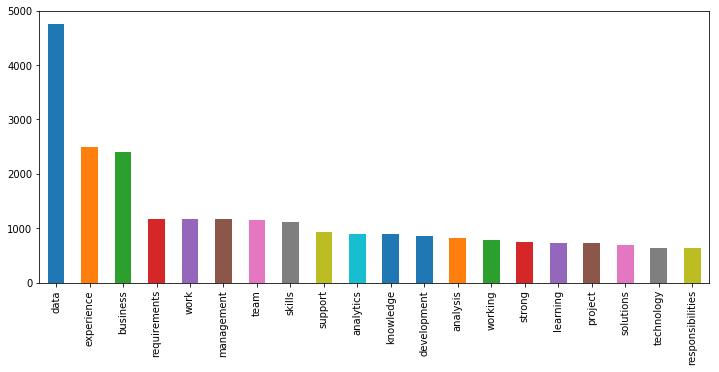

In [63]:
atomic_words_count.plot(kind='bar', figsize=(12,5))

In [64]:
T_test = pd.DataFrame(cv.transform(T_test).todense(),
                       columns=cv.get_feature_names())

In [65]:
print T_train.shape
print T_test.shape
print s_train.shape
print s_test.shape

(802, 11151)
(345, 11151)
(802,)
(345,)


In [66]:
# Trying Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix

classifier = GaussianNB()
GNB_scores = cross_val_score(classifier, T_train, s_train, cv=5)
classifier.fit(T_train, s_train)
classifier.score(T_test, s_test)
print classification_report(s_test, classifier.predict(T_test))

                       precision    recall  f1-score   support

               Others       0.72      0.38      0.50        47
         data analyst       0.62      0.97      0.76       168
        data engineer       0.88      0.23      0.37        30
       data scientist       0.74      0.45      0.56        56
               intern       1.00      0.57      0.73        21
  senior data analyst       0.00      0.00      0.00         4
 senior data engineer       0.00      0.00      0.00        11
senior data scientist       1.00      0.12      0.22         8

          avg / total       0.68      0.66      0.61       345



#### NB result looks alright with 0.61.

### Plotting ROC curve. 

In [67]:
# Predicting the test set results
s_pred = classifier.predict(T_test)

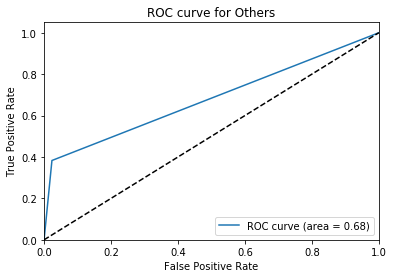

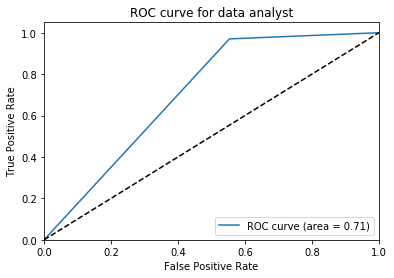

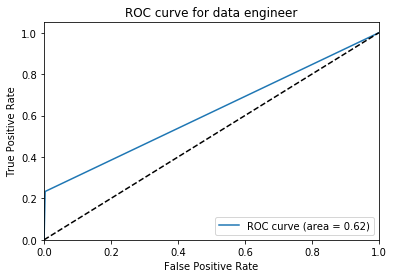

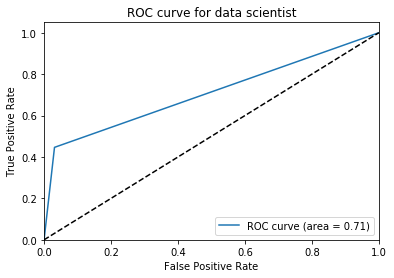

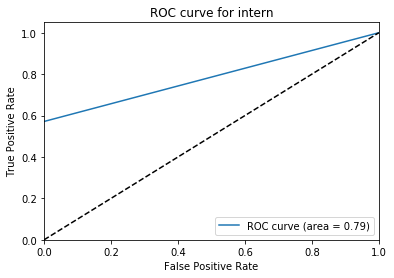

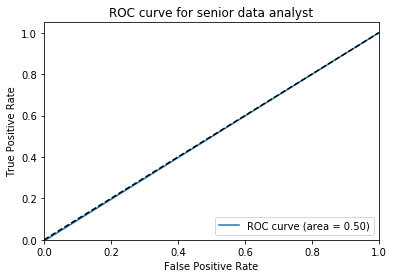

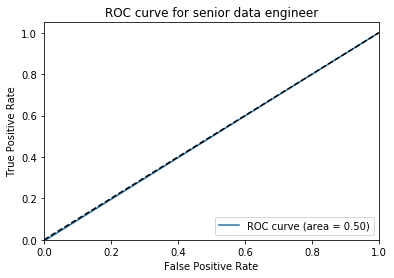

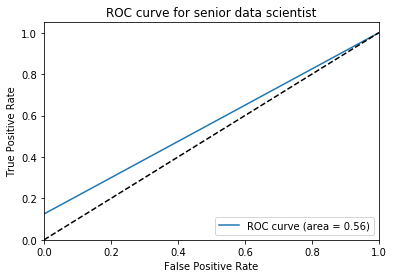

In [68]:
from sklearn.preprocessing import label_binarize

categories =["Others", "data analyst", "data engineer", "data scientist", "intern", "senior data analyst", "senior data engineer", "senior data scientist"]

shat_pp = classifier.predict_proba(T_test)

s_test_roc = label_binarize(s_test, classes=categories)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(categories)):
    fpr[i], tpr[i], _ = roc_curve(s_test_roc[:, i], shat_pp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(len(categories)):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for ' + str(categories[i]))
    plt.legend(loc="lower right")
    plt.show()

#### senior data engineer and senior data analyst straight line because of imbalance issue. 

#### Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.